## Cvičenie 1

Na cvičeniach si budeme často generovať náhodné dáta s požadovanými vlastnosťami. Pri
generovaní je vhodné si najprv nastaviť inicializáciu generátora náhodných čísel (inak by sa vygenerovali pri každom spustení rozdielne dáta). 

Nasledujúci príklad vygeneruje náhodný vektor 100 hodnôt podľa normálneho rozdelenia s 0 strednou hodnotou a štandardnou
odchýlkou 0.5:

In [ ]:
set.seed(1234)
x <- rnorm(100, mean=0, sd=0.5)
print(x)

Hodnoty môžeme vypočítať aj zadaním funkcie. 

Nasledujúce príkazy vygenerujú postupnosť čísel `x od 0 do 10 s krokom 0.5` pre ktorú vypočítajú hodnoty lineárnej funkcie `y = 3 x + 2`.

In [ ]:
x <- seq(from=0, to=10, by=0.5)
print(x)

In [ ]:
f <- function(x) { 3*x + 2 }
y <- sapply(x,f)
print(y)

In [ ]:
plot(y ~ x)

K vygenerovaným dátam môžeme pridať náhodný šum s požadovaným rozdelením pravdepodobnosti. 

Nasledujúci príklad vygeneruje náhodný vektor s uniformným rozdelením s intervalom `[-1,1]`, ktorý pripočíta k hodnotám `y`.

In [ ]:
noise <- runif(length(y), min=-1, max=1)
print(noise)

In [ ]:
y <- y + noise
plot(y ~ x)

### Inštalácia príkladov

Na cvičení budete pracovať s dátami, ktoré sú súčasťou balíka `"AER"`. Balík `"AER"` obsahuje
dátové súbory pripravené pre publikáciu `Applied Econometrics with R`.

Nasledujúce príkazy nainštalujú balík do prostredia R a načítajú dátovú množinu`CPS1985`. Dátovú množinu si premenujeme na `cps`.

In [ ]:
install.packages("AER", repos='http://cran.us.r-project.org')
data("CPS1985", package="AER")

In [ ]:
cps <- CPS1985
print(cps)

Popis dátovej množiny môžete získať príkazom `str`. Príkaz head vypíše niekoľko prvých
záznamov. Dáta obsahujú demografické údaje z prieskumu obyvateľstva z mája roku 1985
a obsahujú základné atribúty ako napr. príjem (`wage`), stupeň vzdelania, vek, atď.

In [ ]:
str(cps)

In [ ]:
head(cps)

Príkazom attach si vytvoríme odkazy na stĺpce dátovej množiny, aby sme sa na nich mohli
priamo odkazovať.

In [ ]:
attach(cps)

### Základné štatistiky pre číselné atribúty

Prehľadové základné štatistiky pre číselné atribúty je možné vypísať príkazom summary.
Jednotlivé štatistiky môžeme vypočítať aj samostatne funkciami `mean` (priemer), `sd`
(štandardná odchýlka), `var` (variancia), atď. Nasledujúce príkazy vypočítajú základné štatistiky
pre príjem.

In [ ]:
summary(wage)

In [ ]:
mean(wage)

In [ ]:
sd(wage)

Graficky si môžeme zobraziť `histogram` hodnôt. Štandardne sa na histograme zobrazí početnosť
príkladov, ktoré spadajú do daného rozsahu histogramu. Ak chceme zobraziť iba odhad
pravdepodobnosti (počet príkladov s hodnotami v danom rozsahu \ celkový počet príkladov),
parameter `freq` nastavíme na `FALSE`. Hodnoty pravdepodobnosti môžeme aproximovať
funkciou hustoty `density`. Nasledujúce príkazy vykreslia histogram s aproximovanou funkciou
hustoty.

In [ ]:
hist(wage)
hist(wage, freq=FALSE)
lines(density(wage))

Aproximovaná funkcia hustoty nám slúži napr. na lepšie vizuálne porovnanie či majú hodnoty
normálne rozdelenie, ktoré má nasledujúci priebeh:

In [ ]:
curve(dnorm, from=-5, to=5)

Dáta za príjem sú vychýlené k nižším hodnotám (tzn. väčší počet ľudí má menší plat). Aby sme
dáta normalizovali, skúsime ich transformovať logaritmickou funkciou. Nasledujúce príkazy
vykreslia histogram a aproximovanú funkciu hustoty pre logaritmicky transformované dáta.

In [ ]:
hist(log(wage), freq=FALSE)
lines(density(log(wage)))

### Základné štatistiky pre faktory (nominálne resp. ordinálne atribúty)

Pre faktory prehľad zobrazí početnosť jednotlivých hodnôt, ktoré je možné graficky zobraziť
stĺpcovým grafom.

In [ ]:
summary(occupation)
barplot(table(occupation))

### Závislosti medzi dvoma číselnými atribútmi

Základnou štatistikou je korelačný koeficient, ktorý meria lineárnu závislosť medzi dvoma
číselnými atribútmi. Nasledujúce príkazy vypočítajú korelačný koeficient medzi príjmom
a vzdelaním. Závislosť si môžeme zobraziť aj graficky kde môžeme potvrdiť linearitu.

In [ ]:
cor(wage, education)
cor(log(wage), education)
plot(log(wage) ~ education)

### Závislosti medzi dvoma faktormi

Závislosť medzi dvoma faktormi môžeme zistiť z kontingenčnej tabuľky, ktorá určuje
početnosť spoločného výskytu hodnôt dvoch faktorov. Početnosť je možné prehľadne zobraziť
graficky vykreslením, napr. mozaikovým grafom. 

In [ ]:
table(gender, occupation)
plot(gender ~ occupation)

Podobne ako sa pre číselné atribúty používa
korelačný koeficient, tak sa pre faktory používa chi-kvadrát test. Ak je kritická hodnota
`p < 0.05` atribúty sa považujú za závislé.

In [ ]:
chisq.test(table(gender, occupation))

### Závislosti medzi jedným číselným atribútom a jedným faktorom

Pomocou funkcie tapply vieme vypočítať štatistiky číselného atribútu pre jednotlivé hodnoty
faktora, napr. nasledujúci príkaz vypočíta priemerný plat samostatne pre mužov a ženy
(hodnoty faktora `gender`). Súhrne je možné závislosti medzi číselným atribútom a faktorom
zobraziť pomocou krabicového grafu (`boxplot`).

In [ ]:
tapply(log(wage), gender, mean)
boxplot(log(wage) ~ gender)

Podrobnejšie je možné zobraziť graf kvantilov (`q-q plot`). Najprv si odfiltrujeme dáta podľa
pohlavia do dvoch podmnožín ktorých kvantily zobrazíme funkciou qqplot. Do grafu pridáme
aj 45st. referenčnú priamku predeľujúcu zobrazenie. Keďže väčšina kvantilov je pod referenčnou
čiarou, muži zarábajú viac.

In [ ]:
mwage <- subset(cps, gender == "male")$wage
fwage <- subset(cps, gender == "female")$wage
qqplot(mwage, fwage, xlim=range(wage), ylim=range(wage))
abline(0,1)

## Úlohy

**1.** Zobrazte histogramy pre všetky číselné atribúty z dátovej množiny `CPS`, zistite ktorý z
nich má približne normálne rozdelenie. Transformujte atribúty použitím logaritmickej
funkcie a zistite, či majú transformované dáta približne normálne rozdelenie.

In [ ]:
hist(wage, freq=F)
lines(density(wage))
# normalizacia log 
hist(log(wage), freq = F)
lines(density(log(wage)))

hist(experience, freq = F)
lines(density(experience))
# normalizacia log
hist(log(experience), freq = F)
lines(density(log(experience)))

hist(education, freq = F)
lines(density(education))
# normalizacia log
hist(log(education), freq = F)
lines(density(log(education)))

hist(age, freq = F)
lines(density(age))
# normalizacia log
hist(log(age), freq = F)
lines(density(log(age)))

**2.** Zobrazte početnosti hodnôt pre všetky faktory (nominálne resp. ordinálne atribúty).
Zistite, ktoré z týchto rozdelení je približne uniformné. Zobrazte stĺpcové grafy s
relatívnymi početnosťami (počet hodnôt/celkový počet príkladov).

In [ ]:
attach(cps)

summary(ethnicity)
summary(region)
summary(gender)
summary(occupation)
summary(sector)
summary(union)
summary(married)

barplot(table(ethnicity)/nrow(cps))
barplot(table(region)/nrow(cps))
barplot(table(gender)/nrow(cps))
barplot(table(occupation)/nrow(cps))
barplot(table(sector)/nrow(cps))
barplot(table(union)/nrow(cps))
barplot(table(married)/nrow(cps))

**3.** Vypočítajte korelačnú maticu medzi všetkými číselnými atribútmi pomocou funkcie cor
(číselné atribúty si môžete vybrať z množiny x použitím funkcie `x[sapply(x,
is.numeric)]`). Pre dvojicu atribútov s najväčšou koreláciou nakreslite `X-Y graf` ich
závislosti.

In [ ]:
cor(cps[sapply(cps, is.numeric)])
plot(age ~ experience)

**4.** Vypočítajte `chi-kvadrát test` pre všetky dvojice faktorov. Pre faktory, ktoré majú
najväčšiu závislosť nakreslite mozaikový graf.

In [ ]:
chisq.test(table(ethnicity, region))
chisq.test(table(ethnicity, gender)) 
chisq.test(table(ethnicity, occupation))
chisq.test(table(ethnicity, sector))
chisq.test(table(ethnicity, union))
chisq.test(table(ethnicity, married))
chisq.test(table(region, gender))
chisq.test(table(region, occupation))
chisq.test(table(region, sector))
chisq.test(table(region, union))
chisq.test(table(region, married)) 
chisq.test(table(gender, occupation))
chisq.test(table(gender, sector))
chisq.test(table(gender, union))
chisq.test(table(gender, married))
chisq.test(table(occupation, sector))
chisq.test(table(occupation, union))
chisq.test(table(occupation, married))
chisq.test(table(sector, union))
chisq.test(table(sector, married))
chisq.test(table(union, married))

plot(gender ~ occupation)

**5.** Vypočítajte a zobrazte priemernú mzdu pre všetky hodnoty a všetky faktory samostatne.
Pre vypočítané hodnoty zobrazte krabicové grafy. Zistite kde sú najväčšie rozdiely v
platoch a pre danú závislosť nakreslite `q-q graf`.

In [ ]:
tapply(log(wage), gender, mean)
boxplot(log(wage) ~ gender)

tapply(log(wage), ethnicity, mean)
boxplot(log(wage) ~ ethnicity)

tapply(log(wage), sector, mean)
boxplot(log(wage) ~ sector)

tapply(log(wage), occupation, mean)
boxplot(log(wage) ~ occupation)

tapply(log(wage), union, mean)
boxplot(log(wage) ~ union)

tapply(log(wage), region, mean)
boxplot(log(wage) ~ region)

tapply(log(wage), married, mean)
boxplot(log(wage) ~ married)

w = subset(cps, occupation == "services")$wage
t = subset(cps, occupation == "technical")$wage

qqplot(w,t,  xlim=range(wage), ylim=range(wage))
abline(0,1)

**6.** Vygenerujte náhodné vektory `x` a `y` o veľkosti `100` hodnôt z normálneho rozdelenia so
`strednou hodnotou 1` a `štandardnou odchýlkou 2`. Zobrazte ich závislosť na `X-Y grafe` a
vypočítajte korelačný koeficient. Pridajte do oboch vektorov jednu extrémnu hodnotu
(napr. `10`, `20`) pomocou funkcie `c()`. Vypočítajte korelačný koeficient na zmenených
dátach a zobrazte `X-Y závislosť`.

In [ ]:
set.seed(1234)
x = rnorm(100, mean = 1, sd = 2)
y = rnorm(100, mean = 1, sd = 2)
cor(x,y)
plot(y ~ x)

x = c(x, 10)
y = c(y, 20)
cor(x,y)
plot(y ~ x)

**7.** Vygenerujte náhodné vektory `x` a `y` o veľkosti `100` hodnôt z normálneho rozdelenia so
`strednou hodnotou 1` a `štandardnou odchýlkou 2`. Vypočítajte korelačný koeficient a
zobrazte ich závislosť. Postupne vygenerujte nové hodnoty vo vektore `y` s rovnakým
stredom `1` ale zmenšujúcou sa štandardnou odchýlkou s hodnotami `2`, `1.5`, `1` a `0.5`. Pre
zmenené hodnoty `y` vypočítajte korelačný koeficient a zobrazte `X-Y` priebeh.

In [ ]:
x = rnorm(100, mean = 1, sd = 2)
y = rnorm(100, mean = 1, sd = 2)
cor(x,y)
plot(x~y)

y2 = rnorm(100, mean = 1, sd = 1.5) 
cor(x,y2)
plot(x~y2)


y3 = rnorm(100, mean = 1, sd = 1) 
cor(x,y3)
plot(x~y3)


y4 = rnorm(100, mean = 1, sd = 0.5) 
cor(x,y4)
plot(x~y4)

**8.** Vygenerujete si sekvenciu dát `x` od `0` do `10` s krokom `0.5`. Pre vygenerované hodnoty `x`
vypočítajte hodnotu funkcie `y = 2.5x + 2` a pridajte k nej šum s normálnym rozdelením
s `0 strednou hodnotou` a `štandardnou odchýlkou 0.5`. Zobrazte priebeh funkcie na `X-Y`
grafe. Postupne pridávajte viac šumu s väčšou štandardnou odchýlkou `1`, `1.5`, `2.0`, `3.0`.
Po každej zmene zobrazte dáta a vypočítajte korelačný koeficient medzi `x` a `y`.

In [ ]:
x = seq(from = 0, to = 10, by = 0.5)
f = function(x) { 
  2.5*x + 2  
  }
y = sapply(x,f)
plot(y ~ x)

noise = rnorm(length(y), mean = 0, sd = 0.5)
y = y + noise
plot(y ~ x)
cor(x,y)

noise2 = rnorm(length(y), mean = 0, sd = 1)
y = y + noise2
plot(y ~ x)
cor(x,y)

noise3 = rnorm(length(y), mean = 0, sd = 1.5)
y = y + noise3
plot(y ~ x)
cor(x,y)

noise4 = rnorm(length(y), mean = 0, sd = 2)
y = y + noise4
plot(y ~ x)
cor(x,y)

noise5 = rnorm(length(y), mean = 0, sd = 3)
y = y + noise5
plot(y ~ x)
cor(x,y)

**9.** Vygenerujete si vektor `x` so `100` hodnotami z uniformného rozdelenia s `min 0` a `max 10`.
Pre vygenerované hodnoty `x` vypočítajte hodnotu funkcie `y = 2*sin(x) + x` a pridajte k
nej šum s normálnym rozdelením s `0 strednou hodnotou` a `štandardnou odchýlkou 0.1`.
Zobrazte priebeh funkcie na `X-Y` grafe a vypočítajte korelačný koeficient medzi `x` a `y`.

In [ ]:
x = runif(100, min = 0, max = 10)
f = function(x){ 2*sin(x) + x }
y = sapply(x,f)
plot(y ~ x)

noise = rnorm(length(y), mean = 0, sd = 0.1)
y = y + noise
plot(y ~ x)
cor(x,y)

# Cvičenie 2 - Časové rady
&nbsp;

Časové rady sú dátové množiny pri ktorých sú jednotlivé hodnoty usporiadané sekvenčne
v čase. Sú definované počiatočným a koncovým časom (napr. dáta od roku 2016 do 2017)
a frekvenciou vzorkovania (napr. s frekvenciou 12 pre mesačné dáta). V prostredí R sa
používajú na reprezentáciu časových radov objekty typu `ts`, ktoré môžete priamo načítať ako
dátovú množinu. 


Množina `AirPassengers` udáva nárast cestujúcich v leteckej dobre v USA a obsahuje hodnoty
od `januára 1949 (1949,1)` do `decembra 1960 (1960,12)`. Vzorkovacia frekvencia je `12 hodnôt`
na rok (tzv. mesačné dáta). 

Funkcia `summary(ts)` zobrazuje len základné charakteristiky číselný hodnôt,
ktoré tvoria časový rad. Počiatočný a koncový čas a frekvenciu vzorkovania môžete vypísať
funkciami `start(ts)`, `end(ts)` a `frequency(ts)`:

In [ ]:
data("AirPassengers")
ap = AirPassengers

In [ ]:
summary(ap)

In [ ]:
start(ap)

In [ ]:
end(ap)

In [ ]:
frequency(ap)

Časové rady si môžete priamo vykresliť pomocou funkcie plot:

In [ ]:
plot(ap, type="o")

Pomocou funkcie `window` je možné vybrať podmnožinu časového radu resp. zmeniť
vzorkovaciu frekvenciu, napr. ak chceme vybrať hodnoty iba za rok 1950 (od januára do
decembra) môžeme zadať:

In [ ]:
window(ap, start=c(1950,1), end=c(1950,12))

<br/><br/>

### Použitie funkcii nad dátami

Dáta za jednotlivé roky (hlavné časové jednotky) je možné agregovať pomocou funkcie
`aggregate`, napr. priemerné hodnoty za rok je možné vypočítať ako:

In [ ]:
print(aggregate(ap, FUN=mean))

Dáta je možné agregovať aj s inou frekvenciou, napr. sumu za pol roka (1/2 hlavnej jednotky)
a za štvrť rok (1/4 hlavnej jednotky) môžete vypočítať ako: 

In [ ]:
aggregate(ap, FUN=sum, nfrequency=2)
aggregate(ap, FUN=sum, nfrequency=4)

Všetky hodnoty je možné agregovať priamo, napr. priemer môžeme určiť funkciou mean:

In [ ]:
mean(ap)

<br/><br/>
#### Možnosti vytvorenia časových radov

1. Objekt časového radu je možné vytvoriť aj z vektora číselných hodnôt. Napr. pre priebeh
funkcie `0.25sin(10x) + 0.5x + 1` na intervale 0 az 5 s krokom 0.1:

In [ ]:
x = seq(from=0, to=5, by=0.1)
y = 0.25*sin(10*x) + 0.5*x + 1

Objekt vytvoríme funkciou `ts`, kde nastavíme počiatočný čas a frekvenciu vzorkovania, napr.:

In [ ]:
t = ts(y, start=c(2017,1), frequency=12)
plot(t)

2. Pomocou funkcie ts môžeme vytvoriť časový rad aj z tabuľkových dát. Dáta môžeme stiahnuť
priamo z internetu, napr. nasledujúci súbor Maine.dat udáva mesačnú mieru nezamestnanosti
v štáte Maine za obdobie 1996 do 2006:

In [ ]:
data = read.table("http://peter.butka.website.tuke.sk/ie/Maine.txt", header=TRUE)
data

In [ ]:
maine = ts(data, start=c(1996,1), frequency=12)
maine

<br/><br/>
## <span style="color:green"> **Základné charakteristiky časových radov** </span>

Z priebehu dát `AirPassengers` vidno, že sa počet pasažierov postupne systematicky zvyšuje,
tzn. dáta majú rastúci **trend**. Okrem trendu vidno cyklické zmeny, ktoré sa periodicky opakujú
– ide o tzv. **sezónnosť**. Časové rady môžeme modelovať rôznou kombináciou trendu `t`,
sezónnosti `s` a **náhodnej zložky** `z`. Najjednoduchším modelom je **aditívny model**, kde sa
hodnoty radu rovnajú súčtu zložiek: `x = t + s + z`. Medzi ďalšie modely patrí napr.
**multiplikatívny model**: `x = t.s.z`.

Najjednoduchší spôsob extrahovania **trendu** je pomocou **centrovaného kĺzavého priemeru**
v okolí každej hodnoty `xt`, ktorý je možné vypočítať pomocou funkcie `filter`. Centrovaný
kĺzavý priemer je vážený priemer, kde prvá a posledná hodnota má váhu 1/2, tzn. napr. pre 12
mesiacov sú váhy `(0.5,1,1,1,1,1,1,1,1,1,1,0.5)/12`:

In [ ]:
ap.t = filter(ap, c(0.5,1,1,1,1,1,1,1,1,1,1,0.5)/12)
plot(ap.t)

Pre aditívny model je možné zvyšné zložky extrahovať odpočítaním od pôvodného radu:

In [ ]:
ap.sz = ap - ap.t
plot(ap.sz)

Z priebehu vidno, že sa cyklické zložky postupne zvyšujú, čo môže indikovať, že je pre tieto
dáta vhodnejší multiplikatívny model. Všetky zložky časového radu pre rôzne typy modelov
je možné vypočítať pomocou funkcie `decompose`, napr. pre **multiplikatívny model**:

In [ ]:
ap.decomp = decompose(ap, type="multiplicative")
plot(ap.decomp)

Jednotlivé zložky modelu sú dostupné vo vlastnostiach `seasonal`, `trend` a `random`. Napr.
nasledujúci príkaz vypočíta základné štatistiky pre **sezónnu zložku**:

In [ ]:
summary(ap.decomp$seasonal) 

<br/><br/>
### Úlohy

**1.** Načítajte súbor http://peter.butka.website.tuke.sk/ie/Maine.txt a vytvorte časový rad pre
mesačné dáta od januára 1996. Vykreslite priebeh. Vypočítajte priemernú hodnotu pre
prvé tri a posledné tri mesiace v roku 1996. Zistite o koľko % sa tieto priemery
odlišujú od priemeru počas celého roku 1996.

In [ ]:
maine=read.table("http://people.tuke.sk/peter.butka/ie/Maine.dat")
t=ts(maine, start = c(1996,1), frequency = 12)
plot(t, type="o")

maine96 = window(t, start=c(1996,1), end=c(1996,12))
ag_priemer = aggregate(maine96, FUN=mean, nfrequency = 4)
celkovy_priemer = mean(maine96)
perc_rozdiel = ((ag_priemer - celkovy_priemer)/celkovy_priemer)*100

**2.** Pre dátovú množinu `Maine` vypočítajte agregovaný časový rad pre priemerné
štvrťročné hodnoty a zobrazte jeho priebeh.

In [ ]:
maine=aggregate(t, FUN = mean, nfrequency = 4)
plot(maine, type="o")

**3.** Načítajte súbor http://peter.butka.website.tuke.sk/ie/CBE.txt . Dáta obsahujú dátovú
množinu so stĺpcami určujúcimi mesačnú produkciu čokolády (stĺpec 1), piva (stĺpec 2)
a elektrickej energie (stĺpec 3) od roku 1958. Načítajte dáta ako časové rady (pre výber
stĺpca môžete použiť zápis CBE[,1], CBE[,2], CBE[,3). Zobrazte všetky tri časové
rady v jednom grafe pomocou funkcie `plot` a `cbind`.

In [ ]:
CBE=read.table("http://peter.butka.website.tuke.sk/ie/CBE.txt", header = T)
CBE
choc = ts(CBE[,1], start = c(1958,1), frequency = 12)
beer = ts(CBE[,2], start = c(1958,1), frequency = 12)
elec = ts(CBE[,3], start = c(1958,1), frequency = 12)

plot(cbind(choc,beer,elec))
CBE_graf=ts(CBE, start = c(1958,1), frequency = 12)
plot(CBE_graf)

**4.** Vypočítajte koreláciu medzi produkciou čokolády a piva.

In [ ]:
cor(beer,elec)

**5.** Na dátovej množine `AirPassengers` postupne aplikujte kĺzavý priemer s šírkou 4
mesiace, 6 mesiacov a 12 mesiacov (tzn. váhy pre 4 mesiace budú `(0.5,1,1,0.5)/4`).
Vyextrahujte trendovú zložku pre každý filter podľa aditívneho modelu a zobrazte jej
priebeh.

In [ ]:
ap=AirPassengers
ap_4=filter(ap, c(0.5,1,1,0.5)/4)
ap_6=filter(ap, c(0.5,1,1,1,1,0.5)/6)
ap_12=filter(ap, c(0.5,1,1,1,1,1,1,1,1,1,1,0.5)/12)
plot(cbind(ap_4,ap_6,ap_12))

**6.** Pomocou funkcie decompose vygenerujte a zobrazte zložky pre aditívny
a multiplikatívny model pre dátovú množinu `AirPassangers`

In [ ]:
ap_multi=decompose(ap, c("multiplicative"))
plot(ap_multi)
ap_addi=decompose(ap, c("additive"))
plot(ap_addi)

**7.** Na intervale [0,5]s krokom 0.1 vygenerujte priebeh funkcií `y = 0.5x + 1 a z = 0.25sin(10x)`. Vygenerujte rovnako veľký náhodný vektor `n` podľa normálneho
rozdelenia s 0 strednou hodnotou a štandardnou odchýlkou 0.5. Vykreslite priebehy
funkcií na jednom zloženom grafe pomocou funkcie `plot` a `cbind`.

In [ ]:
set.seed(1234)
x = seq(from=0, to=5, by=0.1)
y = 0.5*x + 1
yt = ts(y, start=c(2017,1), frequency=12)

z = 0.25*sin(10*x)
zt = ts(z, start=c(2017,1), frequency=12)

n = rnorm(n = 50, mean = 0, sd = 0.5)
nt = ts(n, start=c(2017,1), frequency=12)

plot(cbind(yt,zt,nt))

**8.** Zo zložiek s predchádzajúceho príkladu vytvorte časový rad s aditívnym modelom `y + z + n`, a multiplikatívnym modelom `y.z.n`.

In [ ]:
cr1=yt+zt+nt
plot(cr1)
cr2=yt*zt*nt
plot(cr2)

**9.** Dekomponujte časové rady z predchádzajúceho priebehu pomocou funkcie
`decompose`. Vytvorte pre oba priebehy obe dekompozície aj pre aditívny aj
multiplikatívny model.

In [ ]:
decomp11=decompose(cr1, type = "additive")
plot(decomp11)
decomp12=decompose(cr1, type = "multiplicative")
plot(decomp12)
decomp21=decompose(cr2, type = "additive")
plot(decomp21)
decomp22=decompose(cr2, type = "multiplicative")
plot(decomp22)

**10.** Nahraďte lineárny trend logaritmickým `y = log(x + 1)`, vytvorte aditívny
a multiplikatívny časový rad a dekomponujte ich zložky

In [ ]:
y2=log(x+1)   # namiesto y

y2t=ts(y2, start=c(2017,1), frequency=12)
cr1=y2t+zt+nt
plot(cr1)

cr2=y2t*zt*nt
plot(cr2)

decomp1_1=decompose(cr1, c("multiplicative"))
plot(decomp1_1)
decomp1_2=decompose(cr1, c("additive"))
plot(decomp1_2)
decomp2_1=decompose(cr2, c("multiplicative"))
plot(decomp2_1)
decomp2_2=decompose(cr2, c("additive"))
plot(decomp2_2)

# Cvičenie 3 - Lineárna regresia

<object data="http://people.tuke.sk/viera.maslej.kresnakova/IE/IE/cvicenie3.pdf" type="application/pdf" width="700px" height="700px">
    <embed src="http://people.tuke.sk/viera.maslej.kresnakova/IE/IE/cvicenie3.pdf">
        <p> Cvičenie v PDF dostupné: <a href="http://people.tuke.sk/viera.maslej.kresnakova/IE/IE/cvicenie3.pdf">TU!</a></p>
    </embed>
</object>

V `R` môžeme parametre lineárneho modelu vypočítať pomocou funkcie `lm`.

Nasledujúci príklad načíta dátovú množinu `Iris`, vyfiltruje iba príklady z triedy `setosa`, a vypočíta lineárny
model s jedným **vstupným** atribútom `iris$Sepal.Length` pre **výstupnú** hodnotu `iris$Sepal.Width`

In [ ]:
data(iris)
setosa <- iris[iris$Species == "setosa", ]
attach(setosa)

In [ ]:
sepal_lm <- lm(Sepal.Width ~ Sepal.Length) # y = b0 + b1x1 + b2x2 + b3x3 + ... + bmxm
sepal_lm 

In [ ]:
plot(Sepal.Length, Sepal.Width)
abline(sepal_lm)

V príklade je vykreslená regresná priamka, ktorá určuje **predikovanú hodnotu f(x)** . Ďalšie
vstupné atribúty je možné pridať do modelu pomocou operátora `+`, napr. `lm(Y ~ X1 + X2 +
X3)` je lineárny model, ktorý **predikuje atribút `Y`** na základe troch **vstupných** atribútov `X1`, `X2`
a `X3`.

Pomocou funkcie summary si môžeme vypísať základné štatistiky o rezíduách a parametroch
modelu:

In [ ]:
summary(sepal_lm)

#### Popis funkcie `summary`

Rozdiely medzi predikovanou hodnotu a skutočnou hodnotou `y` sa označujú ako **rezíduá**.
V časti `Residuals` sú informácie o základných štatistikách rezíduí. Tieto rozdiely by mali byť
v absolútnej hodnote čo najmenšie. Rezíduá pre všetky trénovacie príklady môžete získať
pomocou funkcie `residuals`

In [ ]:
residuals(sepal_lm)

Celkovú chybu (sumu štvorcov rezíduí – z čoho sa minimalizovanie kvadratickej chybovej
funkcie označuje metóda najmenších štvorcov) môžete vypísať funkciou:

In [ ]:
deviance(sepal_lm)

##### 2. `Coefficients`

V prehľade viete ďalej zistiť hodnoty samotných parametrov v časti `Coefficients`. Parameter
$\beta_0$ sa označuje ako `Intercept`, pretože určuje v ktorom bode bude regresná priamka **pretínať
os Y**. Keďže ostatné parametre $\beta_0 ... \beta_m $ zodpovedajú jednotlivým **vstupným** atribútom,
parametre sú označené názvom zodpovedajúceho atribútu, napr. `Sepal.Length`. 

To, ako jedôležitý atribút pre výslednú predikciu určuje absolútna veľkosť zodpovedajúceho
parametra, ak sa parameter blíži k 0, atribút je možné z modelu vynechať bez toho aby sa
výrazne zmenila predikcia. Významnosť atribútov sa testuje štatistickým testom ktorého
hypotéza je, že sa zodpovedajúci parameter = 0. Čím menšia je táto pravdepodobnosť, tým
dôležitejší je daný atribút (čo je označené vo výpise aj hviezdičkami, *** dôležitý atribút, **
stredne dôležitý, atď.)

#### Predikcia

Ak chcete vypočítať predikovanú hodnotu pre nové vstupné dáta, môžete použiť funkciu
`predict`:

In [ ]:
predict(sepal_lm, newdata = data.frame(Sepal.Length=6))

Pomocou predikt môžeme vypočítať aj hodnoty pre viac príkladov naraz.

Podľa variancie vstupných dát vieme pri lineárnej regresii odhadnúť aj varianciu parametrov,
ktorá je uvedená ako štandardná odchýlka pri výpise summary pre každý parameter. Keďže
parametre sú odhadované iba s určitou varianciou, aj samotná predikcia je len odhad pre
ktorý môžeme určiť varianciu v akom rozsahu sa bude predikovaná hodnota
najpravdepodobnejšie pohybovať. Tento interval si môžete vypísať pomocou funkcie
`predict`:

In [ ]:
predict(sepal_lm, newdata = data.frame(Sepal.Length=6), interval="prediction")

Pomocou `predict` je potom možné zobraziť aj intervaly spoľahlivosti pre predikciu (v tomto
intervale by sa mala s veľkou pravdepodobnosťou pohybovať skutočná hodnota). 

Najprv si
vygenerujeme vstupné dáta (interval od 4 do 6 s krokom 0.25) a potom vypočítame
predikciu aj s intervalom:

In [ ]:
lengths <- seq(from=4, to=6, by=0.25)
predictions <- predict(sepal_lm, newdata =data.frame(Sepal.Length=lengths), interval="prediction")

In [ ]:
predictions

Hodnoty si zobrazíme v grafe ako interval pomocou horného a spodného ohraničenia:

In [ ]:
plot(Sepal.Length, Sepal.Width)
lines(predictions[,1] ~ lengths, col=1)
lines(predictions[,2] ~ lengths, col=1, lty=2)
lines(predictions[,3] ~ lengths, col=1, lty=2)

Všimnite si, že sa pri krajných hodnotách 4 a 6 interval mierne rozširuje (tzn. pre krajné
vstupné hodnoty môže byť predikovaná hodnota vypočítaná s väčšou varianciou).

# Úlohy

1. Načítajte dátovú množinu `Iris`, odfiltrujte príklady z triedy `setosa` a vytvorte lineárny
model predikujúci atribút `Petal.Width` pre vstupný atribút `Petal.Length`. Vizualizujte
dáta a regresnú priamku

In [ ]:
data(iris)
setosa = iris[iris$Species == "setosa",]
attach(setosa)
petal_lm = lm(Petal.Width ~ Petal.Length)
abline(petal_lm)

2. Vypočítajte celkovú sumu kvadrátov rezíduí modelu z predošlého príkladu a
korelačný koeficient medzi vstupným a výstupným atribútom. Zobrazte histogram
rezíduí.

In [ ]:
deviance(petal_lm)
cor(Petal.Width, Petal.Length)
hist(residuals(petal_lm))

3. Vypočítajte predikciu a interval spoľahlivosti pre trénovacie dáta. Zobrazte graf s
dátami, regresnou priamkou a intervalovými hranicami.

In [ ]:
petal_lm
predict(petal_lm, newdata = data.frame(Petal.Length), interval="prediction") # povodne trenovacie data

plot(Petal.Length, Petal.Width)
lengths = seq(from=1, to=2, by=0.025)
predictions = predict(petal_lm, newdata = data.frame(Petal.Length=lengths), interval="prediction") # nove trenovacie data

lines(predictions[,1] ~ lengths, col=1)
lines(predictions[,2] ~ lengths, col=1, lty=2)
lines(predictions[,3] ~ lengths, col=1, lty=2)

detach(setosa)

4. Z množiny iris odfiltrujte iba príklady z triedy versicolor, vypočítajte predikciu a
intervalové odhady. Zobrazte graf s dátami, regresnou priamkou, a intervalovými
hranicami.

In [ ]:
data(iris)
versicolor = iris[iris$Species == "versicolor",]

attach(versicolor)
petal_ver = lm(Petal.Width ~ Petal.Length)
petal_ver
predict(petal_ver, newdata = data.frame(Petal.Length),interval="prediction") #povodne trenovacie data 

plot(Petal.Length, Petal.Width)
lengths = seq(from=2, to=6, by=0.025)
predictions = predict(petal_ver, newdata = data.frame(Petal.Length=lengths), interval="prediction") #nove trenovacie data

lines(predictions[,1] ~ lengths, col=1)
lines(predictions[,2] ~ lengths, col=1, lty=2)
lines(predictions[,3] ~ lengths, col=1, lty=2)

5. Vytvorte rozšírený model, ktorý bude mať okrem `Petal.Length` na vstupe aj atribút
`Sepal.Width`. Zistite, ktoré parametre modelu sú štatisticky významné, a porovnajte
chybu rozšíreného modelu s predchádzajúcim príkladom.

In [ ]:
petal_ver1 = lm(Petal.Width ~ Petal.Length + Sepal.Width)
summary(petal_ver1)
deviance(petal_ver)
deviance(petal_ver1)
chyba=deviance(petal_ver)-deviance(petal_ver1)
chyba

6. Medzi vstupné atribúty môžete pridať aj faktory (nominálne atribúty). Ak má faktor
napr. 3 hodnoty, `setosa`, `versicolor` a `virginica`, pri zahrnutí do modelu sa prvá
hodnota `setosa` použije ako tzv. referenčná a pre zvyšné hodnoty `versicolor` a
`virginica` sa vygenerujú binárne (tzv. kontrastné) atribúty, pre ktoré sa vypočítajú
dodatočné parametre modelu. Načítajte celú množinu dát `Iris` a vytvorte model, ktorý
bude predikovať `Petal.Width` na základe atribútov `Petal.Length` a `Species`. Zistite,
ktoré z kontrastných hodnôt `versicolor`, alebo `virginica` je viac dôležitá pre predikciu.

In [ ]:
petal_ver2 = lm(iris$Petal.Width ~ iris$Petal.Length + iris$Species)
summary(petal_ver2)

7. Vygenerujte si náhodné vektory `X1`, `X2` a `X3` s 50 hodnotami podľa uniformného
rozdelenia pravdepodobnosti z intervalu 1 až 10. Vytvorte vektor hodnôt `Y = 0.5 +
2*X1 + 1.5 *X2 + X3`. K vektoru Y pripočítajte náhodný šum s normálnym rozdelením s
0 strednou hodnotou a štandardnou odchýlkou 0.5. Vypočítajte parametre
lineárneho modelu priamo analyticky z výrazu **$(X^TX)^{-1}X^Ty = \beta $**. Vypočítajte pre každý príklad predikciu a rezíduá.

In [ ]:
set.seed(123)
x1= runif(50, min=1, max=10)
x2= runif(50, min=1, max=10)
x3= runif(50, min=1, max=10)

y=0.5+2*x1+1.5*x2+x3

ssum= rnorm(length(y), mean=0, sd=0.5)

y=y+ssum

ones=rep(1,50)
X=cbind(ones,x1,x2,x3)
beta=solve(t(X)%*%X)%*%t(X)%*%y
beta

X_lm=lm(y~ X)
X_lm

residuals(X_lm)

8. Pridajte do predchádzajúceho modelu atribút `X4`, ktorého hodnoty sú vždy
dvojnásobkom atribútu `X1` (tzn. `X4=2*X1`). Vypočítajte znova analyticky parametre
modelu (malo by dôjsť k chybe, pre maticu `X` by sa nemala dať vypočítať inverzná
matica ak obsahuje lineárne závislé stĺpce). Vypočítajte korelačný koeficient medzi `X1`
a `X4`. Odstráňte atribút `X1` a zvona vypočítajte parametre lineárneho modelu,
porovnajte vypočítané parametre s predchádzajúcim príkladom.

In [ ]:
set.seed(123)
x1= runif(50, min=1, max=10)
x2= runif(50, min=1, max=10)
x3= runif(50, min=1, max=10)
x4=2*x1

y=0.5+1.5*x2+x3+x4 # povodne y=0.5+2*x1+1.5*x2+x3+x4

ssum= rnorm(length(y), mean=0, sd=0.5)

y=y+ssum

ones=rep(1,50)
X=cbind(ones,x2,x3,x4) # povodne X=cbind(ones,x1,x2,x3,x4)
beta=solve(t(X)%*%X)%*%t(X)%*%y
beta

X_lm=lm(y~ X)
X_lm

residuals(X_lm)


# Predikcia časových radov

<object data="http://people.tuke.sk/viera.maslej.kresnakova/IE/IE/cvicenie4.pdf" type="application/pdf" width="700px" height="700px">
    <embed src="http://people.tuke.sk/viera.maslej.kresnakova/IE/IE/cvicenie4.pdf">
        <p> Cvičenie v PDF dostupné: <a href="http://people.tuke.sk/viera.maslej.kresnakova/IE/IE/cvicenie4.pdf">TU!</a></p>
    </embed>
</object>

Najprv si nainštalujeme balík dynlm a načítame si dátovú množinu USMacroG, ktorá
obsahuje viacero časových radov makroekonomických ukazovateľov USA.

In [ ]:
install.packages("dynlm")

In [ ]:
install.packages("AER", repos='http://cran.us.r-project.org')  # after restart kernel

In [ ]:
library("dynlm")

In [ ]:
data("USMacroG", package="AER")

In [ ]:
summary(USMacroG)

Zobrazíme si v jednom grafe priebehy príjmov dpi a spotreby consumption:

In [ ]:
ts.plot(USMacroG[, c("dpi", "consumption")], lty=c(3,1))


Aby sme zistili či je vhodné modelovať časový rad lineárnym modelom, môžeme si vypočítať
autokorelačné koeficienty, tzn. koreláciu medzi hodnotami $y_t$ a $y_{t-1}$, $y_t$ a $y_{t-2}$ atď. Pre
výpočet a zobrazenie môžeme použiť funkciu `acf`, napr. zobrazíme autokorelačné koeficienty
pre časový rad `dpi` s maximálnym oneskorením 4:


In [ ]:
dpi = USMacroG[,"dpi"]
autocorr = acf(dpi, lag.max=4)

Môžeme si zobraziť aj závislosť medzi $y$ a $y_{t-k}$ kde k je oneskorenie, napr. ak si chceme
zobraziť závislosť medzi $y_t$ a $y_{t-1}$, najprv si prevedieme časovú postupnosť na vektor
funkciou `as.numeric` a potom si vyberieme prvky od `[1:N-1]` a `[2:N]` kde `N` je dĺžka vektora
(počet hodnôt v časovom rade):

In [ ]:
dpi = as.numeric(dpi)
plot(dpi[1:length(dpi)-1], dpi[2:length(dpi)])
cor(dpi[1:length(dpi)-1], dpi[2:length(dpi)])

Ak porovnáme hodnotu korelácie z posledného výpisu s výstupom autokorelačnej funkcie
acf pre oneskorenie 1 (`autocorr[1]`) zistíme, že sa odlišujú pričom by malo ísť o koreláciu
medzi rovnakými hodnotami. Rozdiel je spôsobený odlišnou normalizáciou pri výpočte
korelačného koeficientu, `acf` hodnota je normovaná `1/N` a cor `1/(N-1)`.

Vytvoríme model ktorý bude predikovať spotrebu v čase `t` na základe aktuálnej hodnoty
príjmov `dpi` a predchádzajúcej spotreby v čase `t-1`:

In [ ]:
cons_lm1 <- dynlm(consumption ~ dpi + L(consumption), data=USMacroG)

Výsledný objekt je podobného typu ako pri lineárnej regresii, tzn. funkcia `summary` napr.
zobrazí hodnoty vypočítaných koeficientov a ich významnosť pre predikciu a základné
štatistiky o rezíduách. Podobne môžete vypočítať kvadratickú chybu na trénovacích dátach
funkciou `deviance`.

In [ ]:
summary(cons_lm1)

In [ ]:
deviance(cons_lm1)

Predikované hodnoty pre celý časový rad si môžeme vypočítať funkciou `fitted`:

In [ ]:
fitted(cons_lm1)

Aby sme vyhodnotili presnosť a kvalitu modelu, môžeme si zobraziť časový priebeh a
predikované hodnoty v jednom grafe. Tak isto je užitočné si zobraziť v čase aj hodnoty
rezíduí, ktoré sa dajú vypočítať funkciou `residuals`:

In [ ]:
ts.plot(USMacroG[,"consumption"], fitted(cons_lm1),
lty=c(1:2))
ts.plot(residuals(cons_lm1))

# Úlohy na cvičení

1. Načítajte dáta `USMacroG`. Pre časový rad consumption vypočítajte a zobrazte
pomocou funkcie `acf` autokorelačné koeficienty až do oneskorenia 10.

In [ ]:
# nacitaj data
library("dynlm")
data("USMacroG", package="AER")
consumption = USMacroG[,"consumption"]

# vypocitaj a zobraz autokorelacne koeficient s max. oneskorenim = 10
autocorr = acf(consumption, lag.max = 10)

2. Pre časový rad consumption si vytvorte dátovú množinu zloženú z oneskorených
atribútoch v čase `t`, `t-1`, `t-2`, `t-3`, `t-4` a `t-5`. Pomocou funkcie `cor` vypočítajte korelačnú
maticu pre všetky atribúty. Zistite s ktorým atribútom je najviac korelovaný atribút `t-2`, `t-3` a `t-4`, a zobrazte závislosti medzi `t-2`, `t-3` a `t-4` a najviac korelovanými atribútmi.

In [ ]:
# zmen datovy typ premennej consumption
cons_numeric = as.numeric(consumption)
length(cons_numeric)

# vytvor oneskorene atributy v case t, t-1, ... t-5
cons0 = cons_numeric[1:(length(cons_numeric)-5)]
cons1 = cons_numeric[2:(length(cons_numeric)-4)]
cons2 = cons_numeric[3:(length(cons_numeric)-3)]
cons3 = cons_numeric[4:(length(cons_numeric)-2)]
cons4 = cons_numeric[5:(length(cons_numeric)-1)]
cons5 = cons_numeric[6:length(cons_numeric)]

# vytvor datovu mnozinu - dataframe - zlozenu z predch. atributov a urob korelacnu maticu
df_cor = data.frame(cons0, cons1, cons2, cons3, cons4, cons5)
cor(df_cor)

# vykresli zavislost medzi najviac korelovanymi atributmi
plot(cons2, cons3)
plot(cons3, cons4)
plot(cons4, cons5)

3. Pomocou funkcie cor vypočítajte korelačný koeficient medzi hodnotami časového
radu `consumtion` a všetkými ostatnými ukazovateľmi v dátovej množine `USMacroG`.
Vyberte dva ukazovatele, ktoré sú s `consumption` najviac korelované. Vytvorte
prediktívny model, ktorý predikuje $consumption_t$ na základe týchto dvoch atribútov
oneskorených o `t-1`.

In [ ]:
# vytvor korelacnu maticu medzi vsetkymi ukazovatelmi z nasich dat
# z matice vycitas, ze najviac korelovane s "consumption" su "gdp" a "dpi"
cor(USMacroG)

# prirad si do premennych potrebne atributy (zjednodusenie naslednej prace)
gdp = USMacroG[,"gdp"]
dpi = USMacroG[,"dpi"]

# vytvor model, ktory predikuje "consumption" na zaklade "gdp" a "dpi" oneskorenych o t-1
cons_lm1 = dynlm(consumption ~ L(gdp,1) + L(dpi,1))
cons_lm1

4. Zobrazte priebeh radu `consumption` a predikcie modelu z predchádzajúceho príkladu.
Vypočítajte rezíduá a zobrazte priebeh rezíduí.

In [ ]:
# zobraz priebeh radu "consumption" a predikcie modelu z predch. prikladu
ts.plot(consumption, fitted(cons_lm1), lty=c(1:2))

# vypocitaj a zobraz priebeh rezidui tohto modelu
ts.plot(residuals(cons_lm1))

5. Vytvorte autokorelačné prediktívne modely  

    $consumption_t = \beta_0 + \beta_1 dpi_t + \beta_2 dpi_{t-1}$ 

    a

    $consumption_t = \beta_0 + \beta_1 dpi_t + \beta_2 dpi_{t-1} + \beta_3 consumption_{t-1}$ 

    a 

    $consumption_t = \beta_{0} + \beta_1 dpi_t + \beta_2 consumption_{t-1}$. 

    Na jednom grafe zobrazte priebeh časového radu consumption a predikcie všetkých troch modelov.

In [ ]:
# vytvor autokorelacne modely podla zadania
cons_lm2 = dynlm(consumption ~ dpi + L(dpi,1))
cons_lm2
cons_lm3 = dynlm(consumption ~ dpi + L(dpi,1) + L(consumption,1))
cons_lm3
cons_lm4 = dynlm(consumption ~ dpi + L(consumption,1))

# zobraz priebeh "consumption" a predikcii vs. troch vytvorenych modelov
ts.plot(consumption, fitted(cons_lm2), fitted(cons_lm3), fitted(cons_lm4), lty=c(1:4))

6. Vyhodnoťte presnosť modelov pomocou funkcie `deviance`. Zistite, ktorý model je
najlepší a zistite, ktorý vstupný atribút je najdôležitejší pre tento model. Zobrazte X-Y
závislosť medzi `consumption` a najdôležitejším atribútom.

In [ ]:
# vyhodnot presnost nasich doterajsich 4 modelov
deviance(cons_lm1)
deviance(cons_lm2)
deviance(cons_lm3)
deviance(cons_lm4)

# najlepsi je model "cons_lm3"
# zisti, ktory vstupny atribut tohto modelu je najdolezitejsi
summary(cons_lm3)

# najdolezitejsi je atribut "consumption" s casovym oneskorenim t-1
# zobraz zavislost medzi "consumption" a "consumption (t-1)"
plot(consumption[1:length(consumption)-1], consumption[2:length(consumption)])

7. Zobrazte časový priebeh rezíduí a histogram rezíduí pre model $consumption_t = \beta_0 +
\beta_1 dpi_t + \beta_2 dpi_{t-1} + \beta_3 consumption_{t-1}.$

In [ ]:
# vytvor model podla zadania
# je to ten isty model ako "cons_lm3"
cons_lm5 = dynlm(consumption ~ dpi + L(dpi) + L(consumption)) # ako cons_lm3

# zobraz priebeh reziduii tohto modelu
ts.plot(residuals(cons_lm5))

# zobraz histogram rezidui tohto modelu
hist(residuals(cons_lm5))

8. Načítajte dáta `AirPassengers`. Pomocou funkcie acf zobrazte autokorelačný graf.
    Všimnite si ako sa mení hodnota autokorelačných koeficientov pri časových radoch s
    cyklickou zložkou. Vytvorte autoregresný model 

    $y_t = \beta_0 + \beta_1(y_{t−1} − y_{t−2}) + \beta_2 y_{t−4}$. 

    Dekomponujte časový priebeh AirPassengers na aditívne zložky pomocou funkcie `dec = decompose(AirPassengers)`. Vyberte z priebehu iba zložku trendu `dec$trend` a vytvorte autoregresný model 

    $y_t = \beta_0 + \beta_1(y_{t−1} − y_{t−2}) + \beta_2 y_{t−4} $
   
    pre časový priebeh trendu. Vypočítajte predikciu modelu funkciou `fitted` a pripočítajte k
    nej sezónnu zložku `dec$seasonal`. Výsledný časový rad zobrazte v jednom grafe spolu
    s priebehom `AirPassengers` a predikciou predchádzajúceho modelu

In [ ]:
# nacitaj nove data
data("AirPassengers")

# zobraz autokorelacny graf
autocorr_air = acf(AirPassengers)

# vytvor autoregresny model podla zadania a vypocitaj jeho predikciu
lm1 = dynlm(AirPassengers ~ (L(d(AirPassengers),1)) + L(AirPassengers,4))
predicted_airPassengers = fitted(lm1)

# dekomponuj priebeh AirPassengers a prirad trendovu zlozku do novej premennej
dec = decompose(AirPassengers, type = "additive")
dec_trend = dec$trend

# vytvor autoregresny model pre trendovu zlozku a vypocitaj jeho predikciu
lm2 = dynlm(dec_trend ~ (L(d(trend),1)) + L(dec_trend,4))
predicted_trend = fitted(lm2)

# scitaj ziskanu sezonnu zlozku s predikovanou trendovou zlozkou
trend_seasonal = predicted_trend + dec$seasonal

# vykresli casove rady
ts.plot(AirPassengers, predicted_airPassengers, trend_seasonal, gpars = list(col = c("black", "red", "green")))

In [1]:
pip install nbmerge

ERROR: Error in parse(text = x, srcfile = src): <text>:1:5: unexpected symbol
1: pip install
        ^


# Cvičenie 5

<object data="http://people.tuke.sk/viera.maslej.kresnakova/IE/IE/cvicenie5.pdf" type="application/pdf" width="700px" height="700px">
    <embed src="http://people.tuke.sk/viera.maslej.kresnakova/IE/IE/cvicenie5.pdf">
        <p> Cvičenie v PDF dostupné: <a href="http://people.tuke.sk/viera.maslej.kresnakova/IE/IE/cvicenie5.pdf">TU!</a></p>
    </embed>
</object>

## Almonovej model

Ako prvé potrebujeme pero a papier :)

Načítame si dáta USMacroG a vytvoríme model pre predikovanie dpi podľa atribútu
consumption s časovým oknom M=3 a veľkosťou polynómu K=2. Najprv skonvertujeme
časové rady na číselné vektory.

In [ ]:
install.packages("AER", repos='http://cran.us.r-project.org')  # after restart kernel

In [ ]:
data("USMacroG", package="AER")

In [ ]:
y = as.numeric(USMacroG[,"dpi"])
x = as.numeric(USMacroG[,"consumption"])

Vytvoríme si vektory pre posunuté atribúty $x_t$, $x_{t-1}$, $x_{t-2}$, $x_{t-3}$ a $y_t$:

In [ ]:
N = length(x)
x_t3 = x[1:(N-3)]
x_t2 = x[2:(N-2)]
x_t1 = x[3:(N-1)]
x_t = x[4:N]
y_t = y[4:N]

Vypočítame si transformované atribúty $z_0$, $z_1$, $z_2$:

In [ ]:
z0 = x_t + x_t1 + x_t2 + x_t3
z1 = x_t1 + (2*x_t2) + (3*x_t3)
z2 = x_t1 + (4*x_t2) + (9*x_t3)

Pomocou funkcie lm si vypočítame parametre $a_0$, $a_1$, $a_2$. Pre model bez posunu je potrebné
vo výraze `lm` zadať medzi závislé parametre 0.

In [ ]:
td = data.frame(y_t, z0, z1, z2)
td_lm = lm(y_t ~ 0 + z0 + z1 + z2, td)
td_lm
alfa = as.numeric(coefficients(td_lm))
alfa

Z parametrov $a_0$, $a_1$, $a_2$ spätne vypočítame $\beta_0$, $\beta_1$, $\beta_2$, $\beta_3$:

In [ ]:
beta0 = alfa[1]
beta1 = alfa[1] + alfa[2] + alfa[3]
beta2 = alfa[1] + 2*alfa[2] + 4*alfa[3]
beta3 = alfa[1] + 3*alfa[2] + 9*alfa[3]
beta0
beta1
beta2
beta3

## Koyckov model

In [ ]:
install.packages("dynlm")

In [ ]:
library("dynlm")

In [ ]:
model = dynlm(dpi ~ consumption + L(dpi,1), USMacroG)
model

# Úlohy

1. Vytvorte Almonovej model s časovým oknom M=5 a polynómom stupňa K=3 pre
predikovanie časového radu `dpi` na základe radu `consumption`. Vypočítajte
predikciu modelu na trénovacích dátach a zobrazte skutočnú hodnotu `dpi` a
predikovanú hodnotu na spoločnom grafe.

In [ ]:
dpi=USMacroG[,"dpi"]
cons=USMacroG[,"consumption"]

y = as.numeric(dpi)
x = as.numeric(cons)

N = length(x)
x_t5 = x[1:(N-5)]
x_t4 = x[2:(N-4)]
x_t3 = x[3:(N-3)]
x_t2 = x[4:(N-2)]
x_t1 = x[5:(N-1)]
x_t = x[6:N]
y_t = y[6:N]

z0 = x_t + x_t1 + x_t2 + x_t3 + x_t4 +x_t5
z1 = x_t1 + (2*x_t2) + (3*x_t3) + (4*x_t4) + (5*x_t5)
z2 = x_t1 + (4*x_t2) + (9*x_t3) + (16*x_t4) + (25*x_t5)
z3 = x_t1 + (8*x_t2) + (27*x_t3) + (64*x_t4) + (125*x_t5)

td = data.frame(y_t, z0, z1, z2, z3)
td_lm = lm(y_t ~ 0 + z0 + z1 + z2 +z3, td)
alfa = as.numeric(coefficients(td_lm))

beta0 = alfa[1]
beta1 = alfa[1] + alfa[2] + alfa[3] + alfa[4]
beta2 = alfa[1] + 2*alfa[2] + 4*alfa[3] + 8*alfa[4]
beta3 = alfa[1] + 3*alfa[2] + 9*alfa[3] + 27*alfa[4]
beta4 = alfa[1] + 4*alfa[2] + 16*alfa[3] + 64*alfa[4]
beta5 = alfa[1] + 5*alfa[2] + 25*alfa[3] + 125*alfa[4]

ts.plot(dpi[6:204],as.ts(fitted(td_lm)),lty=c(1:2))

length(dpi)
length(fitted(td_lm))

2. Vypočítajte korelačnú maticu medzi atribútmi $x_t$, $x_{t-1}$, $x_{t-2}$, $x_{t-3}$, $x_{t-4}$, $x_{t-5}$ z
predchádzajúceho príkladu a vyhodnoťte, ktoré dvojice sú silno korelované.

In [ ]:
t=data.frame(x_t,x_t1,x_t2,x_t3,x_t4,x_t5)
cor(t)

3. Vytvorte štandardný autoregresný model pre predikovanie časového radu `dpi` na
základe `consumption` s časovým oknom M=5:

𝑦𝑡 = 𝛽0𝑥𝑡 + 𝛽1𝑥𝑡−1 + 𝛽2𝑥𝑡−2 + 𝛽3𝑥𝑡−3 + 𝛽4𝑥𝑡−4 + 𝛽5𝑥𝑡−5

Porovnajte presnosť modelu s Almonovej modelom. Porovnajte vypočítané
koeficienty podľa štandardného modelu a po Almonovej transformácii.

In [ ]:
library("dynlm")
dpi_lm <- dynlm(dpi ~ L(consumption,5) , data=USMacroG)

summary(dpi_lm)
summary(td_lm)

4. Vytvorte Koyckov model pre predikciu časového radu `gdp` od hodnoty `invest`.
Vypočítajte predikciu modelu na trénovacích dátach a zobrazte ich na spoločnom
grafe s priebehom `gdp`.

In [ ]:
library(dynlm)
model = dynlm(gdp ~ invest+L(gdp,1), data = USMacroG)

fitted(model)
ts.plot(fitted(model),USMacroG[,"gdp"],lty=c(1,2))

# Cvičenie 6 - Bayesov klasifikátor

<object data="http://people.tuke.sk/viera.maslej.kresnakova/IE/IE/cvicenie6.pdf" type="application/pdf" width="700px" height="700px">
    <embed src="http://people.tuke.sk/viera.maslej.kresnakova/IE/IE/cvicenie6.pdf">
        <p> Cvičenie v PDF dostupné: <a href="http://people.tuke.sk/viera.maslej.kresnakova/IE/IE/cvicenie6.pdf">TU!</a></p>
    </embed>
</object>

Ako príklad si uvedieme postup pre klasifikáciu do dvoch tried (`iris setosa` a `iris versicolor`).
Načítame si dáta a vytvoríme si podmnožiny pre jednotlivé triedy:

In [ ]:
data(iris)
setosa = iris[iris$Species == "setosa",]
setosa
versicolor = iris[iris$Species == "versicolor",]
versicolor

In [ ]:
setosa = as.matrix(setosa[1:4])
setosa
versicolor = as.matrix(versicolor[1:4])
versicolor

Vypočítame si `P(Y=y)` pre obe triedy:

In [ ]:
p_setosa = nrow(setosa)/(nrow(setosa)+nrow(versicolor))
p_setosa
p_versicolor = nrow(versicolor)/(nrow(setosa)+nrow(versicolor))
p_versicolor

Vypočítame si kovariančné matice a vektory stredov pre jednotlivé triedy:

In [ ]:
C_setosa = cov(setosa)
C_setosa
C_versicolor = cov(versicolor)
C_versicolor

In [ ]:
mean_setosa = colMeans(setosa)
mean_setosa
mean_versicolor = colMeans(versicolor)
mean_versicolor

Pre nový príklad s hodnotami `x = (5.7, 2.8, 4.1, 1.3)` vypočítame pravdepodobnosť `𝑃(𝑋 =
𝒙|𝑌 = 𝑐)` dosadením **kovariančnej matice** a **vektora stredov pre jednotlivé triedy**. Pre
viachodnotové normálne rozdelenie môžeme pravdepodobnosť `𝑃(𝑋 = 𝒙|𝑌 = 𝑐)` vypočítať
pomocou funkcie `dvnorm` z balíka `emdbook`:

In [ ]:
install.packages("emdbook")

In [ ]:
library(emdbook)

In [ ]:
x = c(5.7, 2.8, 4.1, 1.3) # tento priklad chceme klasifikovat

In [ ]:
p_x_setosa = dmvnorm(x, mean_setosa, C_setosa)
p_x_versicolor = dmvnorm(x, mean_versicolor, C_versicolor)

p_x_setosa
p_x_versicolor

In [ ]:
p_setosa * p_x_setosa
p_versicolor * p_x_versicolor

Keďže hodnota pre celkový výraz `𝑃(𝑌 = 𝑐)𝑃(𝑋 = 𝒙|𝑌 = 𝑐)` je oveľa väčšia pre triedu
`versicolor`, príklad s hodnotami `x = (5.7, 2.8, 4.1, 1.3)` by sme zaradili do triedy `versicolor`.

## Ulohy

1. Načítajte si dáta iris a vypočítajte parametre Bayesovho klasifikátora pre všetky tri
triedy `setosa`, `versicolor` a `virginica`.

In [ ]:
setosa = iris[iris$Species == "setosa",]
versicolor = iris[iris$Species == "versicolor",]
virginica = iris[iris$Species == "virginica",]

setosa = as.matrix(setosa[1:4])
versicolor = as.matrix(versicolor[1:4])
virginica = as.matrix(virginica[1:4])

p_setosa = nrow(setosa)/(nrow(setosa)+nrow(versicolor)+nrow(virginica))
p_versicolor = nrow(versicolor)/(nrow(setosa)+nrow(versicolor)+nrow(virginica))
p_virginica = nrow(virginica)/(nrow(setosa)+nrow(versicolor)+nrow(virginica))

C_setosa = cov(setosa)
C_versicolor = cov(versicolor)
C_virginica = cov(virginica)

mean_setosa = colMeans(setosa)
mean_versicolor = colMeans(versicolor)
mean_virginica = colMeans(virginica)

2. Klasifikujte všetky príklady, tzn. vypočítajte pre každý príklad z množiny `iris`
pravdepodobnosti pre všetky tri triedy a určite do ktorej triedy by príklad patril.
Vypočítajte celkovú presnosť klasifikácie (počet správne klasifikovaných príkladov /
počet všetkých príkladov)

In [ ]:
x = c(5.7, 2.8, 4.1, 1.3)

p_x_setosa = dmvnorm(x, mean_setosa, C_setosa)
p_x_versicolor = dmvnorm(x, mean_versicolor, C_versicolor)
p_x_virginica = dmvnorm(x, mean_virginica, C_virginica)

p_setosa * p_x_setosa
p_versicolor * p_x_versicolor
p_virginica * p_x_virginica

3. Nainštalujte si balík `MASS` a pomocou funkcie` mvrnorm(n, means, C)` si vygenerujte `N
= 500` príkladov s viachodnotovým normálnym rozdelením so stredmi `means = c(2,3`
a kovariančnou maticou `C = matrix(c(9,6,6,16),2,2)`. Zobrazte vygenerované dáta na
grafe. Postupne meňte hodnoty matice C, vygenerujte si nové dáta a pozorujte ako sa
zmenia na grafe:

    * a. Nastavte hodnoty mimo diagonály na 0.
    * b. Nastavte hodnoty na diagonále na 10,10 a 2,2.
    * c. Nastavte hodnoty mimo diagonály na -3

In [2]:
install.packages("MASS")
library(MASS)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [3]:
n=500
means = c(2,3)

In [16]:
#     ak na vedlajsej diagonale su nuly tak to znamena ze su x a y uplne nezavisle ze tam nie su ziadne interakcie, t.j. 
#     x a y su zavisle len od svojej variancie, ak x=y tak je rozdelenie hodnot rovnake na oboch stranach

#     ak tam dame nejake hodnoty prida sa tam interakcia, takze x uz nebude zavisle iba od svojej variancie, ale aj od toho ake velke je y

#     ak je tam zaporne => error, lebo nie je splnena podmienka -> symetrická, pozitívne definitná

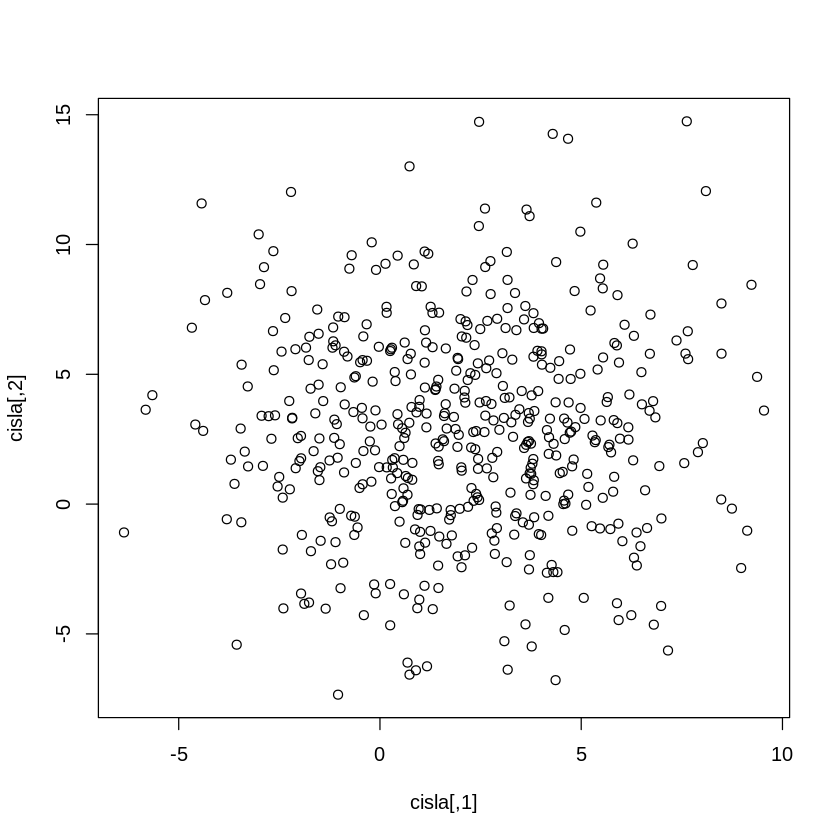

In [11]:
C1 = matrix(c(9,0,0,16),2,2)
cisla = mvrnorm(n, means, C1)
plot(cisla)

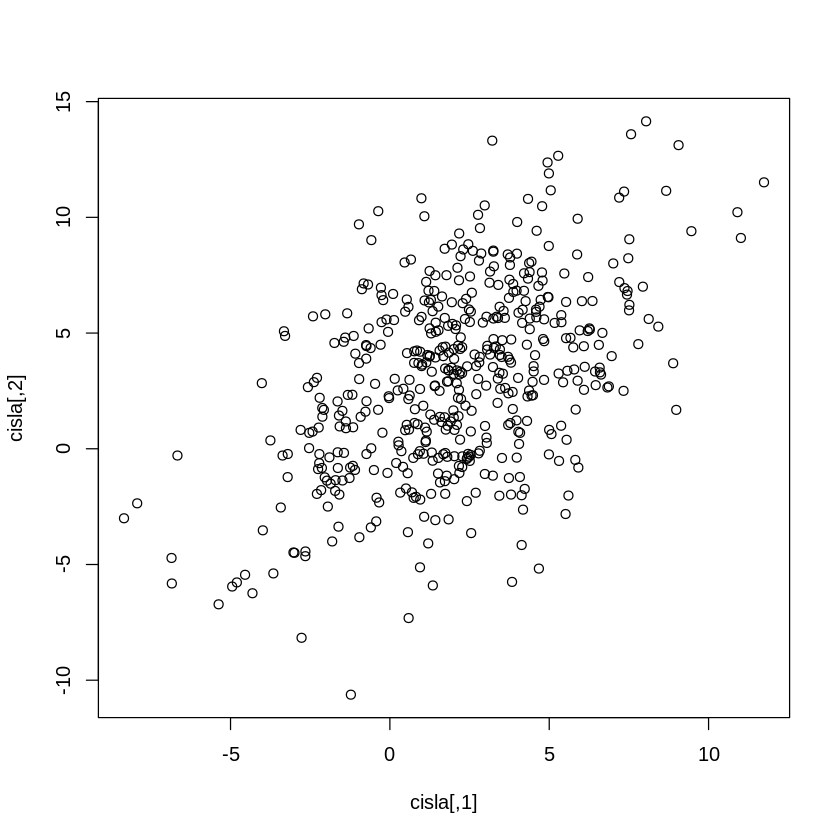

In [12]:
C2 = matrix(c(9,6,6,16),2,2)
cisla = mvrnorm(n, means, C2)
plot(cisla)

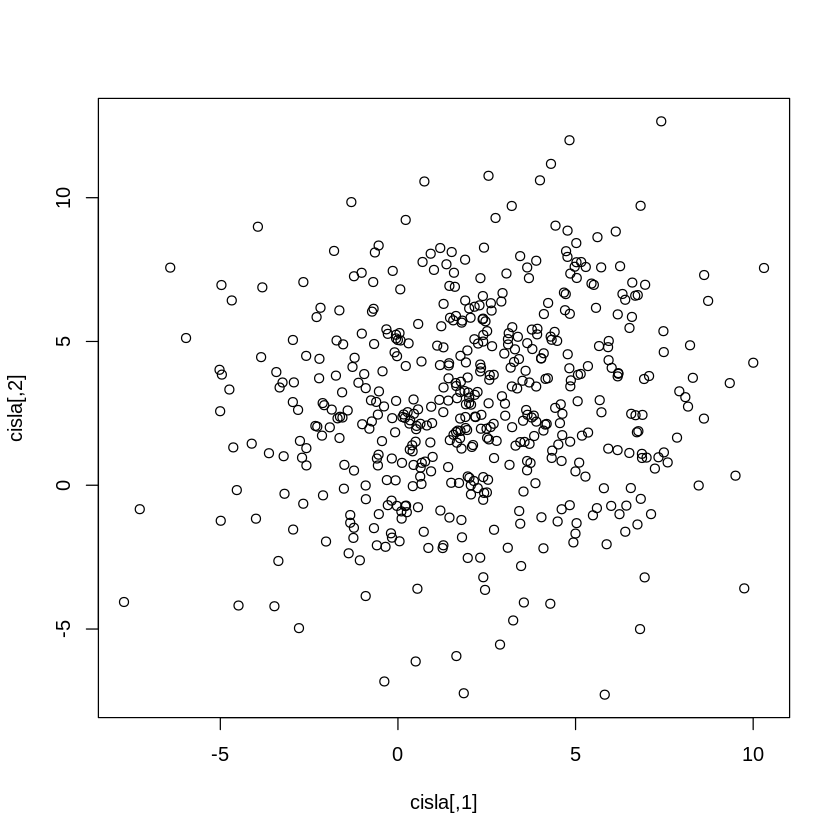

In [13]:
C3 = matrix(c(10,0,0,10),2,2)
cisla = mvrnorm(n, means, C3)
plot(cisla)

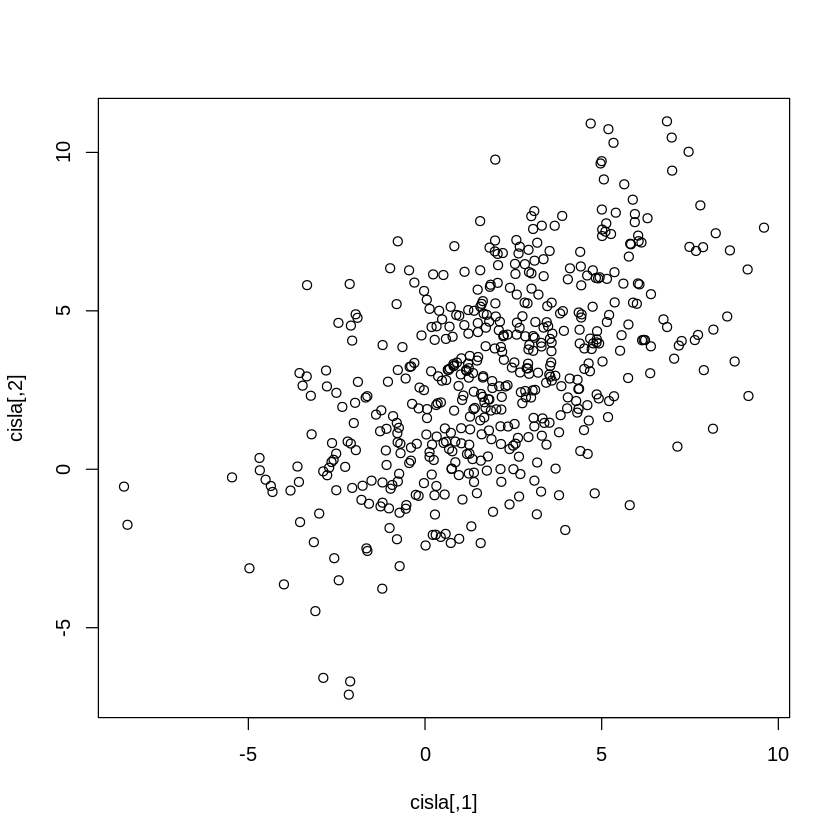

In [14]:
C4 = matrix(c(10,6,6,10),2,2)
cisla = mvrnorm(n, means, C4)
plot(cisla)

In [15]:
C5= matrix(c(-3,0,6,-3),2,2)
cisla = mvrnorm(n, means, C5)
plot(cisla)

ERROR: Error in mvrnorm(n, means, C5): 'Sigma' is not positive definite


4. Pomocou funkcie mvrnorm si vygenerujte dve dátové množiny o veľkosti `100` a `200`
príkladov pre triedy so stredmi `(10,20)` a `(20,30)` a kovariančnými maticami `[(6,2), (2,8)] a [(6,-3), (-3,6)]`. Vypočítajte parametre Bayesovho klasifikátora a klasifikujte
príklad s hodnotami `(15, 25)`.

In [ ]:
means1 = c(10,20)
means2 = c(20,30)
C1 = matrix(c(6,2,2,8),2,2)
C2 = matrix(c(6,-3,-3,6),2,2)

x1 = mvrnorm(100, means1, C1)
x2 = mvrnorm(200, means2, C2)
plot(x1)
plot(x2)


x = c(15,25)

p1=nrow(x1)/(nrow(x1)+nrow(x2))
p1
p2=nrow(x2)/(nrow(x1)+nrow(x2))
p2

p_x1 = dmvnorm(x, means1, C1)
p_x1
p_x2 = dmvnorm(x, means2, C2)
p_x2

p1*p_x1
p2*p_x2